## Perform Exploratory Data Analysis (EDA) to uncover interesting patterns, insights, and potential anomalies within the Weather dataset that we used for week 1 Assignment.Please address the following questions and tasks in your analysis:
### Data Overview and Cleaning:
- What are the key characteristics of the dataset? (e.g., number of records, features, data types)
- Identify and handle any missing or null values. Describe your approach and reasoning.
- Check for and address any duplicate records.
### Statistical Summary:
- Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
- Identify and describe any significant outliers in the data.
### Data Visualization:
- Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
- Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.
- Create correlation matrices and heatmaps to identify relationships between different weather parameters.
### Weather Patterns and Trends:
- Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?
I- nvestigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?
### Insights and Conclusions:
- Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?
- How can these insights be useful for weather prediction or other practical applications?
### Recommendations for Further Analysis:
- Suggest areas for further analysis or additional data that might be useful to explore.
Please present your findings in a well-organized report, including both written explanations and visualizations. Use appropriate libraries (e.g., pandas, matplotlib, seaborn) and ensure your code is well-documented and reproducible.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
                                                                                                                                                                                                                        

In [4]:
df = pd.read_csv('Weather_data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### Data Overview and Cleaning:
- What are the key characteristics of the dataset? (e.g., number of records, features, data types)
- Identify and handle any missing or null values. Describe your approach and reasoning.
- Check for and address any duplicate records.

In [6]:
# We see that we have 8 columns/ features and 8784 columns
df.shape

(8784, 8)

In [7]:
#  To see the datatypes of our features 
df.info()
#  From the outcome below we find that we have two object columns and the remaining 6 are either float or int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [12]:
# We find the number of null values in our data .....we are safe here but note its only here usually data is  dirty :)
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [14]:
#  We explore to see if we can actually find duplicated values??
df.duplicated().sum()
# Our outputs say we have none

0

### Statistical Summary:
- Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
- Identify and describe any significant outliers in the data.

In [32]:
#  we seek to see descriptive statistics
stat_summa = df.describe()
print(stat_summa)
'''
from the output below we can see the count suggests that all columns have the same rows meaning we dont have null values
We can also see that our meand and median values are close hence infering that we might hava normal distribution

'''

            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


'\nfrom the output below we can see the count suggests that all columns have the same rows meaning we dont have null values\nWe can also see that our meand and median values are close hence infering that we might hava normal distribution\n\n'

- Minimum of -23.3°C This extremes indicate potential outliers, the minimum value, which is significantly lower than the first quartile (0.1°C). Such low temperatures might correspond to rare or extreme weather events

### Data Visualization:
- Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
- Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.
- Create correlation matrices and heatmaps to identify relationships between different weather parameters.

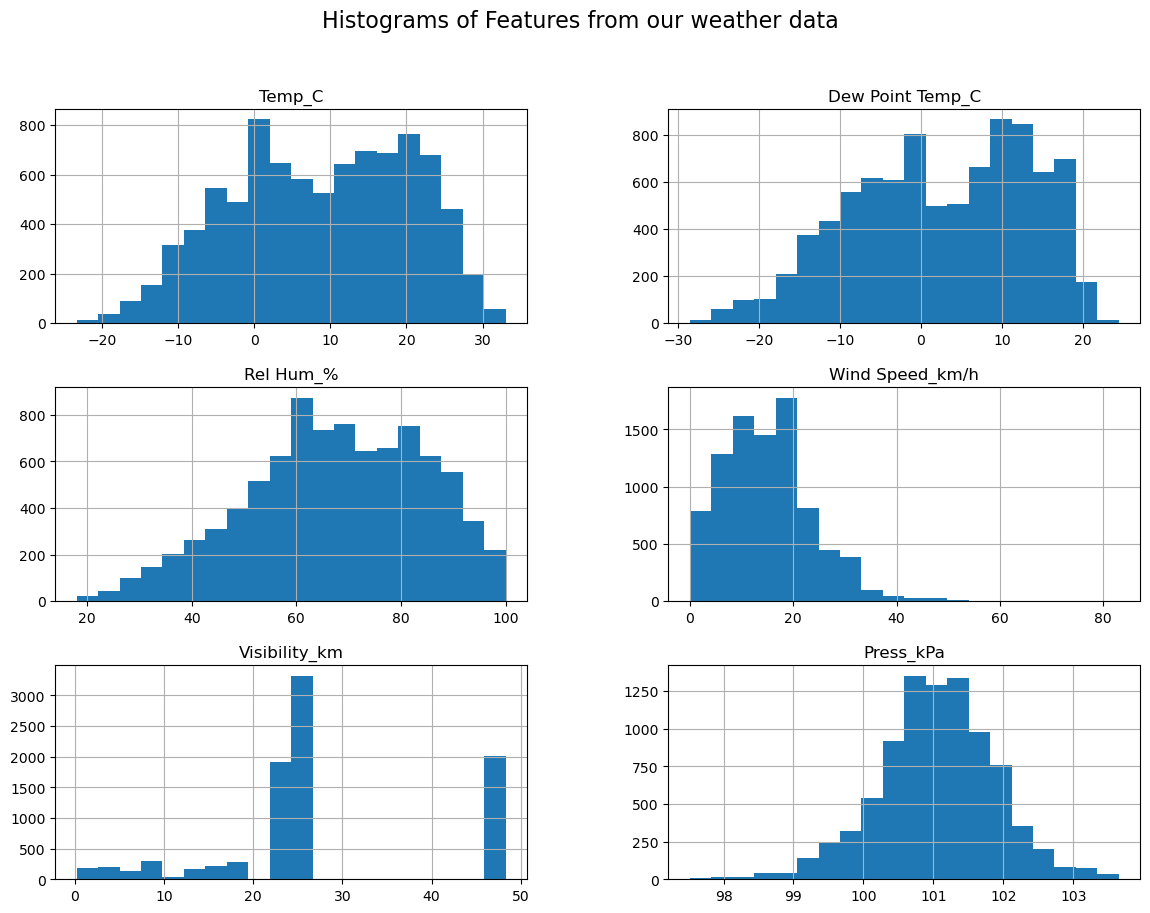

In [52]:
 # Histograms 
df.hist(figsize=(14, 10), bins=20)
plt.suptitle('Histograms of Features from our weather data', fontsize=16)
plt.show()

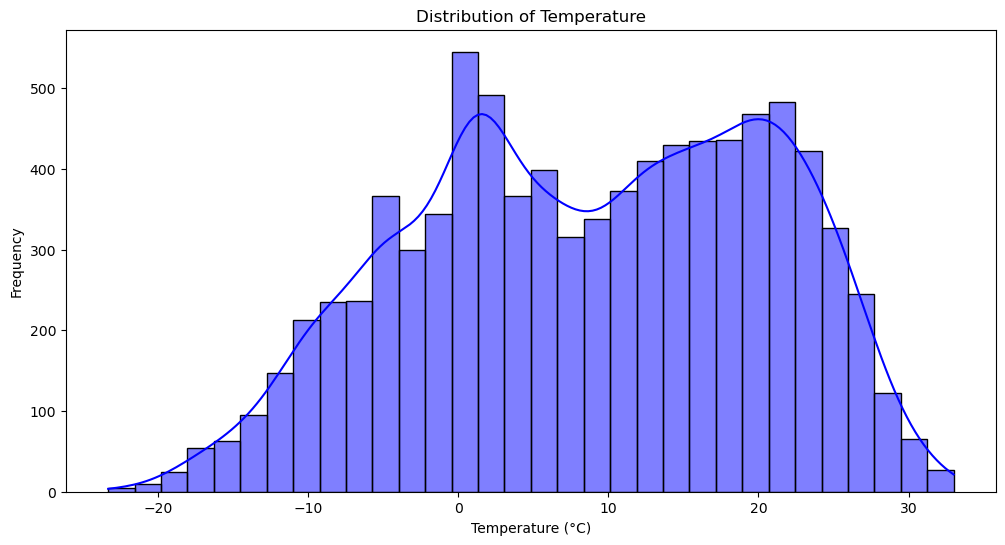

In [38]:

#  We start by the distribution of temparature
plt.figure(figsize=(12, 6))
sns.histplot(df['Temp_C'], kde=True, color='blue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()



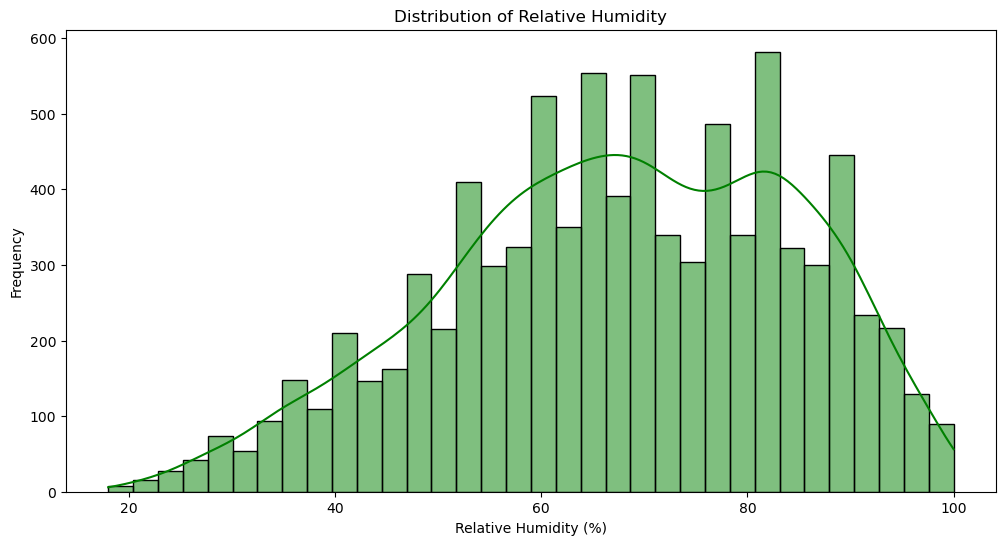

In [42]:
# Plotting Humidity distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Rel Hum_%'], kde=True, color='green')
plt.title('Distribution of Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.show()



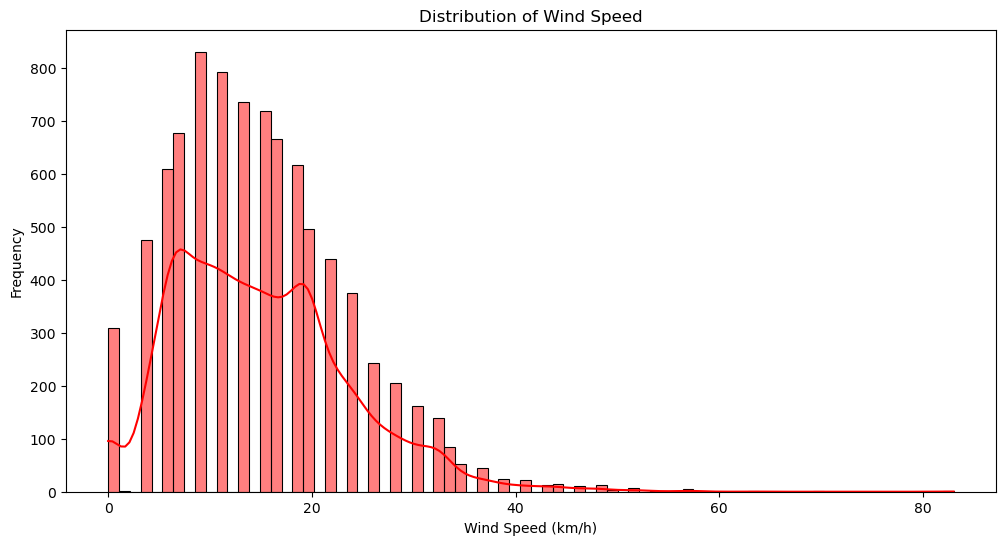

In [44]:
# Plotting Wind Speed distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Wind Speed_km/h'], kde=True, color='red')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

In [46]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

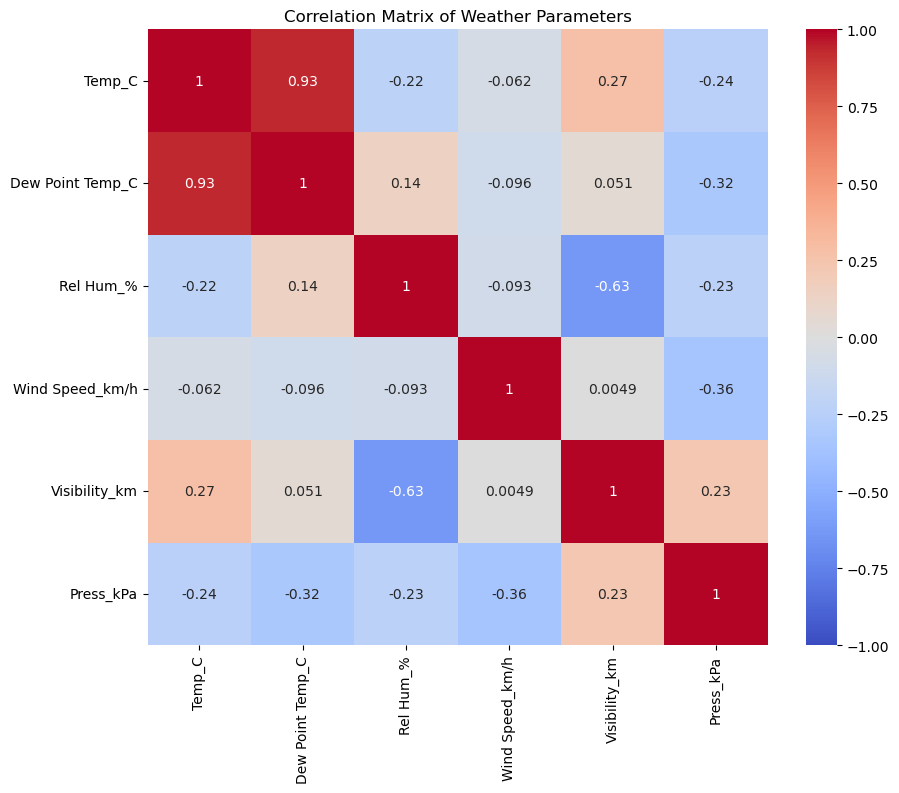

In [56]:
# Correlation Matrix and Heatmaps

# Correlation matrix
correlation_matrix = df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
                         'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

### Weather Patterns and Trends:¶
- Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months? I- nvestigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?


- Correlation Between Parameters
By using a correlation matrix, we observe:
Positive Correlation: Temp_C and Dew Point Temp_C show a strong positive correlation, as higher temperatures usually increase the dew point.
Negative Correlation: Temp_C negatively correlate with Rel Hum_%, as higher temperatures can lower relative humidity if moisture levels are constant.
